In [39]:
import pandas as pd
import os
import numpy as np
import datetime
import chardet
import time
from matplotlib import pyplot as plt
from collections import Counter
from itertools import combinations

In [40]:
df = pd.read_csv('results.csv', sep=',', encoding='latin-1', on_bad_lines='skip', low_memory=False)
analysis = ["OR Result", "Confluence Inter Result", "OA Inter Result", "DF Inter Result", "PDG Result"]
result_analysis = ["Confluence Inter", "OA Inter", "left right DFP-Inter", "right left DFP-Inter", "left right PDG", "right left PDG"]

In [41]:
df = df[df["Confluence Inter"] != "not-found"]
df = df[df["LOI"] != "-"]
print(df["Confluence Inter"].count())



99


In [42]:
def calculate_matrix(columns):
    results = []
    for index, row in df.iterrows():
        values = [row[column] for column in columns]
        loi = row["LOI"]
        or_value = any(value != 'FALSE' for value in values)
        result = ""
        if or_value == True and loi == 'Yes':
            result = "TRUE POSITIVE"
        elif or_value == False and loi == 'No':
            result = "TRUE NEGATIVE"
        elif or_value == False and loi == 'Yes':
            result = "FALSE NEGATIVE"
        elif or_value == True and loi == 'No':
            result = "FALSE POSITIVE"
        
        results.append(result)
    return results

In [43]:
# verificando se o OR da planilha é igual ao da função

r = calculate_matrix(result_analysis)
# print(r)

lista = [i for i in df["OR Result"]]

if r == lista:
    print("Iguais")

# print(lista)

Iguais


In [44]:
# Lista dos elementos
elements = ["Confluence", "OA", "DF", "PDG"]
combinations_list = []
# Gerar todas as combinações possíveis de 2 a 4 elementos sem repetições
for length in range(1, len(elements) + 1):
    for combination in combinations(elements, length):
        combinations_list.append(list(combination))

print(combinations_list)



[['Confluence'], ['OA'], ['DF'], ['PDG'], ['Confluence', 'OA'], ['Confluence', 'DF'], ['Confluence', 'PDG'], ['OA', 'DF'], ['OA', 'PDG'], ['DF', 'PDG'], ['Confluence', 'OA', 'DF'], ['Confluence', 'OA', 'PDG'], ['Confluence', 'DF', 'PDG'], ['OA', 'DF', 'PDG'], ['Confluence', 'OA', 'DF', 'PDG']]


In [45]:
lista1 = elements

lista2 = combinations_list

combina = []

for elemento_lista2 in lista2:
    for elemento_lista1 in lista1:
        if elemento_lista1 not in elemento_lista2:
            combina.append([elemento_lista1] + elemento_lista2)

print(combina)


[['OA', 'Confluence'], ['DF', 'Confluence'], ['PDG', 'Confluence'], ['Confluence', 'OA'], ['DF', 'OA'], ['PDG', 'OA'], ['Confluence', 'DF'], ['OA', 'DF'], ['PDG', 'DF'], ['Confluence', 'PDG'], ['OA', 'PDG'], ['DF', 'PDG'], ['DF', 'Confluence', 'OA'], ['PDG', 'Confluence', 'OA'], ['OA', 'Confluence', 'DF'], ['PDG', 'Confluence', 'DF'], ['OA', 'Confluence', 'PDG'], ['DF', 'Confluence', 'PDG'], ['Confluence', 'OA', 'DF'], ['PDG', 'OA', 'DF'], ['Confluence', 'OA', 'PDG'], ['DF', 'OA', 'PDG'], ['Confluence', 'DF', 'PDG'], ['OA', 'DF', 'PDG'], ['PDG', 'Confluence', 'OA', 'DF'], ['DF', 'Confluence', 'OA', 'PDG'], ['OA', 'Confluence', 'DF', 'PDG'], ['Confluence', 'OA', 'DF', 'PDG']]


In [46]:
def get_name_analysis(list_name):
    names = []
    for i in list_name:
        if ("Confluence" in i):
            names.append("Confluence Inter")
        elif ("OA" in i):
            names.append("OA Inter")
        elif ("DF" in i):
            names.append("left right DFP-Inter")
            names.append("right left DFP-Inter")
        elif ("PDG" in i):
            names.append("left right PDG")
            names.append("right left PDG")

    return names

In [47]:
analysis_combination = []
for i in combina:
    analysis_combination.append(get_name_analysis(i))
print(analysis_combination)

[['OA Inter', 'Confluence Inter'], ['left right DFP-Inter', 'right left DFP-Inter', 'Confluence Inter'], ['left right PDG', 'right left PDG', 'Confluence Inter'], ['Confluence Inter', 'OA Inter'], ['left right DFP-Inter', 'right left DFP-Inter', 'OA Inter'], ['left right PDG', 'right left PDG', 'OA Inter'], ['Confluence Inter', 'left right DFP-Inter', 'right left DFP-Inter'], ['OA Inter', 'left right DFP-Inter', 'right left DFP-Inter'], ['left right PDG', 'right left PDG', 'left right DFP-Inter', 'right left DFP-Inter'], ['Confluence Inter', 'left right PDG', 'right left PDG'], ['OA Inter', 'left right PDG', 'right left PDG'], ['left right DFP-Inter', 'right left DFP-Inter', 'left right PDG', 'right left PDG'], ['left right DFP-Inter', 'right left DFP-Inter', 'Confluence Inter', 'OA Inter'], ['left right PDG', 'right left PDG', 'Confluence Inter', 'OA Inter'], ['OA Inter', 'Confluence Inter', 'left right DFP-Inter', 'right left DFP-Inter'], ['left right PDG', 'right left PDG', 'Conflue

In [48]:
#Algoritmo
#Se todos os TP e TN de uma análise A1 são também TP e TN de outra análise A2, e A2 tem pelo 
#menos um TP ou TN a mais que A1, o algoritmo indica que a gente deve ficar apenas com A2

#Se todos os TP e TN de uma análise A1 são também TP e TN de outra análise A2, e A2 não tem 
#nenhum TP ou TN a mais que A1, o algoritmo indica que a gente deve ficar com a mais rápida entre A1 e A2

#Se nem todos os TP e TN de uma análise A1 são também TP e TN de outra análise A2, e vice-versa, 
#o algoritmo sugere a gente ficar com o OR de A1 e A2

#Se todos os TP e TN de uma análise (CONJUNTO - OU de n análise) são também TP e TN de outra análise A2, e A2 tem pelo 
#menos um TP ou TN a mais que A1, o algoritmo indica que a gente deve ficar apenas com A2

def compare_algorithm(list1, list2):
    TPIgual = True
    TNIgual = True
    for (l1, l2) in zip(list1, list2):
        if (l1 == "TRUE POSITIVE" and l1 != l2):
            TPIgual = False
        if (l1 == "TRUE NEGATIVE" and l1 != l2):
            TNIgual = False


    if (TPIgual and TNIgual and (list2.count("TRUE POSITIVE") > list1.count("TRUE POSITIVE") or list2.count("TRUE NEGATIVE") > list1.count("TRUE NEGATIVE"))):
        print("Vamos optar por Last!")
    elif (TPIgual and TNIgual and (list2.count("TRUE POSITIVE") == list1.count("TRUE POSITIVE") or list2.count("TRUE NEGATIVE") == list1.count("TRUE NEGATIVE"))):
        print("Ficar com a mais rápida!")
    else:
        print("Vamos optar pelo First!")

In [49]:
def count_fp_fn(list_result):
    # Criar um contador dos elementos da lista
    element_count = Counter(list_result)

    result = []
    # Imprimir a contagem de elementos repetidos
    for element, count in element_count.items():
        if count > 1:
            result.append((str(element)+": "+str(count)))
    return result

In [50]:
class Longest:
    maiorPrecision = -1.0
    maiorRecall = -1.0
    maiorF1 = -1.0
    maiorAcuracia = -1.0
    mPrecision = ""
    mRecall = ""
    mF1 = ""
    mAcuracia = ""

    def __init__(self):
        self.maiorPrecision = -1.0
        self.maiorRecall = -1.0
        self.maiorF1 = -1.0
        self.maiorAcuracia = -1.0
        mPrecision = ""
        mRecall = ""
        mF1 = ""
        mAcuracia = ""


    def confusion_matrix(self, options):

        # Inicializar as variáveis
        tp = None
        fp = None
        tn = None
        fn = None
        
        # Extrair os valores dos elementos da lista
        for option in options:
            if "TRUE POSITIVE" in option:
                tp = int(option.split(': ')[1])
            elif "FALSE POSITIVE" in option:
                fp = int(option.split(': ')[1])
            elif "TRUE NEGATIVE" in option:
                tn = int(option.split(': ')[1])
            elif "FALSE NEGATIVE" in option:
                fn = int(option.split(': ')[1])

        # Calcular as métricas se todos os valores foram extraídos
        if tp is not None and fp is not None and tn is not None and fn is not None:
            precision = tp / (tp + fp)
            recall = tp / (tp + fn)
            f1_score = 2 * (precision * recall) / (precision + recall)
            accuracy = (tp + tn) / (tp + tn + fp + fn)

            if (precision > self.maiorPrecision):
                self.maiorPrecision = precision
                
            if (recall > self.maiorRecall):
                self.maiorRecall = recall
                
            if (f1_score > self.maiorF1):
                if (f1_score > 0.45):
                    print("Encontrou!")
                self.maiorF1 = f1_score
                
            if (accuracy > self.maiorAcuracia):            
                self.maiorAcuracia = accuracy


            # Imprimir as métricas
            print(f"Precision: {precision:.2f}")
            print(f"Recall: {recall:.2f}")
            print(f"F1 Score: {f1_score:.2f}")
            print(f"Accuracy: {accuracy:.2f}")
                
            result_metrics = {
                "precision": precision,
                "recall": recall,
                "f1_score": f1_score,
                "accuracy": accuracy
            }
            return result_metrics
        else:
            print("Não foi possível extrair todos os valores necessários.")

        return None


In [51]:
df = df[df["Confluence Inter"] != "not-found"]
df = df[df["LOI"] != "-"]
print(df["Confluence Inter"].count())

99


In [58]:
#Escolhendo qual o melhor resultado com base no Algoritmo de comparação
obj = Longest()

for i in analysis_combination:
    val = -1
    if ("left" in str(i[-1:])):
        val = -2
    last_element = i[val:]
    first_elements = i[:val]
    
    # print(i, first_elements, last_element)
    r_first = calculate_matrix(first_elements)
    r_last = calculate_matrix(last_element)

    print("Comparing OR of the first", first_elements, "with the last", last_element)
    print("First:", count_fp_fn(r_first))
    obj.confusion_matrix(count_fp_fn(r_first))
    print("Last: ", count_fp_fn(r_last))
    obj.confusion_matrix(count_fp_fn(r_last))
    compare_algorithm(r_first, r_last)
    print()

print("Precision:", obj.maiorPrecision)
print("Recall:", obj.maiorRecall)
print("F1-score:", obj.maiorF1)
print("Accuracy:", obj.maiorAcuracia)


Comparing OR of the first ['OA Inter'] with the last ['Confluence Inter']
First: ['TRUE NEGATIVE: 62', 'FALSE NEGATIVE: 29', 'TRUE POSITIVE: 4', 'FALSE POSITIVE: 4']
Precision: 0.50
Recall: 0.12
F1 Score: 0.20
Accuracy: 0.67
Last:  ['TRUE NEGATIVE: 48', 'FALSE NEGATIVE: 27', 'TRUE POSITIVE: 6', 'FALSE POSITIVE: 18']
Precision: 0.25
Recall: 0.18
F1 Score: 0.21
Accuracy: 0.55
Vamos optar pelo First!

Comparing OR of the first ['left right DFP-Inter', 'right left DFP-Inter'] with the last ['Confluence Inter']
First: ['TRUE NEGATIVE: 45', 'FALSE NEGATIVE: 22', 'TRUE POSITIVE: 11', 'FALSE POSITIVE: 21']
Precision: 0.34
Recall: 0.33
F1 Score: 0.34
Accuracy: 0.57
Last:  ['TRUE NEGATIVE: 48', 'FALSE NEGATIVE: 27', 'TRUE POSITIVE: 6', 'FALSE POSITIVE: 18']
Precision: 0.25
Recall: 0.18
F1 Score: 0.21
Accuracy: 0.55
Vamos optar pelo First!

Comparing OR of the first ['left right PDG', 'right left PDG'] with the last ['Confluence Inter']
First: ['FALSE POSITIVE: 15', 'TRUE POSITIVE: 14', 'TRUE NEG

In [53]:

def check_exclusive(op1, op2, val):
    
    count = 0
    for i, j in zip(op1, op2):
        if (val in i and (val not in j)):
            count = count + 1
    return count

In [54]:
def check_algorithm_tp_fp(first, last):
    first_tp = check_exclusive(first, last, "TRUE POSITIVE")
    first_fp = check_exclusive(first, last, "FALSE POSITIVE")
    r_first = first_tp-first_fp
    print("TP exclusive first:", first_tp, ", FP exclusive first:", first_fp, ", saldo:", r_first)
    
    last_tp = check_exclusive(last, first, "TRUE POSITIVE")
    last_fp = check_exclusive(last, first, "FALSE POSITIVE")
    r_last = last_tp-last_fp
    print("TP exclusive last:", last_tp, ", FP exclusive last:", last_fp, ", saldo:", r_last)

    if (r_first > r_last):
        print("Escolher first (OR)!")
    elif (r_first < r_last):
        print("Escolher last!")
    else:
        print("Ficar com a mais rápida!")

In [55]:
#Escolhendo qual o melhor resultado com base na tabela de TP - FP
obj = Longest()

for i in analysis_combination:
    val = -1
    if ("left" in str(i[-1:])):
        val = -2
    last_element = i[val:]
    first_elements = i[:val]
    # print(i, first_elements, last_element)
    r_first = calculate_matrix(first_elements)
    r_last = calculate_matrix(last_element)

    print("Comparing OR of the first", first_elements, "with the last", last_element)
    print("First:", count_fp_fn(r_first))
    
    obj.confusion_matrix(count_fp_fn(r_first))
    print("Last: ", count_fp_fn(r_last))
    obj.confusion_matrix(count_fp_fn(r_last))

    check_algorithm_tp_fp(r_first, r_last)
    print()

Comparing OR of the first ['OA Inter'] with the last ['Confluence Inter']
First: ['TRUE NEGATIVE: 62', 'FALSE NEGATIVE: 29', 'TRUE POSITIVE: 4', 'FALSE POSITIVE: 4']
Precision: 0.50
Recall: 0.12
F1 Score: 0.20
Accuracy: 0.67
Last:  ['TRUE NEGATIVE: 48', 'FALSE NEGATIVE: 27', 'TRUE POSITIVE: 6', 'FALSE POSITIVE: 18']
Precision: 0.25
Recall: 0.18
F1 Score: 0.21
Accuracy: 0.55
TP exclusive first: 1 , FP exclusive first: 1 , saldo: 0
TP exclusive last: 3 , FP exclusive last: 15 , saldo: -12
Escolher first (OR)!

Comparing OR of the first ['left right DFP-Inter', 'right left DFP-Inter'] with the last ['Confluence Inter']
First: ['TRUE NEGATIVE: 45', 'FALSE NEGATIVE: 22', 'TRUE POSITIVE: 11', 'FALSE POSITIVE: 21']
Precision: 0.34
Recall: 0.33
F1 Score: 0.34
Accuracy: 0.57
Last:  ['TRUE NEGATIVE: 48', 'FALSE NEGATIVE: 27', 'TRUE POSITIVE: 6', 'FALSE POSITIVE: 18']
Precision: 0.25
Recall: 0.18
F1 Score: 0.21
Accuracy: 0.55
TP exclusive first: 6 , FP exclusive first: 5 , saldo: 1
TP exclusive l

In [56]:
# Calcular pontuação para cada resultado
def calculate_score(metrics, weights):
    return sum(metrics[metric] * weights[metric] for metric in metrics)

def check_algorithm_weights(first, last, precision, recall, f1_score, accuracy):
    result_1_metrics = confusion_matrix(count_fp_fn(first))
    result_2_metrics = confusion_matrix(count_fp_fn(last))
    
    # Definir pesos para as métricas (você pode ajustar esses pesos)
    weights = {
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score,
        "accuracy": accuracy
    }

    score_1 = calculate_score(result_1_metrics, weights)
    score_2 = calculate_score(result_2_metrics, weights)

    print(f"Score First: {score_1:.2f}")
    print(f"Score Last: {score_2:.2f}")

    # Determinar qual resultado é melhor com base na pontuação
    if score_1 > score_2:
        best_result = "First"
    else:
        best_result = "Last"

    print(f"O melhor resultado é {best_result}!")


In [57]:
#Escolhendo qual o melhor resultado com base na tabela de TP - FP

for i in analysis_combination:
    val = -1
    if ("left" in str(i[-1:])):
        val = -2
    last_element = i[val:]
    first_elements = i[:val]
    # print(i, first_elements, last_element)
    r_first = calculate_matrix(first_elements)
    r_last = calculate_matrix(last_element)

    print("Comparing OR of the first", first_elements, "with the last", last_element)
    print("First:", count_fp_fn(r_first))
    print("Last: ", count_fp_fn(r_last))
    
    # "precision": 0.4
    # "recall": 0.3
    # "f1_score": 0.2
    # "accuracy": 0.1
    check_algorithm_weights(r_first, r_last, 0.4, 0.3, 0.2, 0.1)

    
    print()

Comparing OR of the first ['OA Inter'] with the last ['Confluence Inter']
First: ['TRUE NEGATIVE: 62', 'FALSE NEGATIVE: 29', 'TRUE POSITIVE: 4', 'FALSE POSITIVE: 4']
Last:  ['TRUE NEGATIVE: 48', 'FALSE NEGATIVE: 27', 'TRUE POSITIVE: 6', 'FALSE POSITIVE: 18']


NameError: name 'confusion_matrix' is not defined

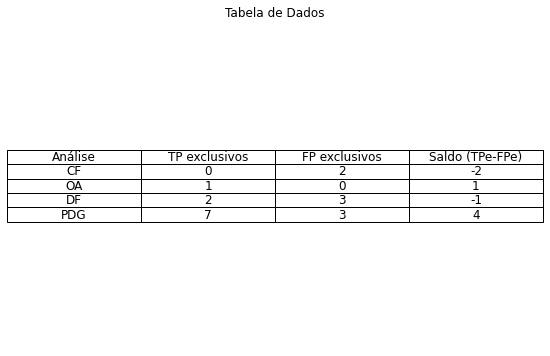

In [ ]:
#Cálculo de TP e FP exclusivo para cada análise

def check_exclusivo(op1, op2, op3, op4, val):
    if (val in op1 and (val not in op2 and val not in op3 and val not in op4)):
        return 1
    return 0

analysis = ["OR Result", "Confluence Inter Result", "OA Inter Result", "DF Inter Result", "PDG Result"]

cf_tp, df_tp, oa_tp, pdg_tp = 0, 0, 0, 0

cf_fp, df_fp, oa_fp, pdg_fp = 0, 0, 0, 0

for (cf, df, oa, pdg) in zip(df["Confluence Inter Result"], df["DF Inter Result"], df["OA Inter Result"], df["PDG Result"]):
    if ("nan" not in str(cf)):

        cf_tp = cf_tp + check_exclusivo(cf, df, oa, pdg, "TRUE POSITIVE")
        df_tp = df_tp + check_exclusivo(df, cf, oa, pdg, "TRUE POSITIVE")
        oa_tp = oa_tp + check_exclusivo(oa, df, cf, pdg, "TRUE POSITIVE")
        pdg_tp = pdg_tp + check_exclusivo(pdg, cf, df, oa, "TRUE POSITIVE")

        cf_fp = cf_fp + check_exclusivo(cf, df, oa, pdg, "FALSE POSITIVE")
        df_fp = df_fp + check_exclusivo(df, cf, oa, pdg, "FALSE POSITIVE")
        oa_fp = oa_fp + check_exclusivo(oa, df, cf, pdg, "FALSE POSITIVE")
        pdg_fp = pdg_fp + check_exclusivo(pdg, cf, df, oa, "FALSE POSITIVE")

data = {
    'Análise': ['CF', 'OA', 'DF', 'PDG'],
    'TP exclusivos': [cf_tp, oa_tp, df_tp,  pdg_tp],
    'FP exclusivos': [cf_fp, oa_fp, df_fp,  pdg_fp]
}

dframe = pd.DataFrame(data)
dframe['Saldo (TPe-FPe)'] = dframe['TP exclusivos'] - dframe['FP exclusivos']

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=dframe.values, colLabels=dframe.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title("Tabela de Dados")
plt.savefig('tabela.png', bbox_inches='tight', pad_inches=0.5)

